# Analyse en composantes principales

Réalisé par Adimi Alaa Dania

L’ACP est utilisée pour résumer le plus d’informations possibles en un nombre limité de nouvelles variables appelées composantes principales. Ces composantes principales sont une combinaison linéaire des variables de départ, et peuvent être utilisées pour construire des représentations graphiques des données, en perdant le moins possible d’information. L'ACP est donc une méthode de réduction des dimensions et de visualization.

Dans ce notebook, on va effectuer une ACP sur des données issues du PV des étudiants en 1cs de l’année 2021/2022. On a choisi d’exploiter les notes du S1 relatives à tous les modules étudiés à savoir SYS1, ANUM, RES1, RO, THP, LANG1, IGL et ORGA.

## Bibliothèques

In [1]:
# Pour faire notre étude, on aura besoin de différentes bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math

%matplotlib inline

## Préparation des données

Dans cette partie, on va effectuer toutes les opérations de nettoyage et de transformation nécessaire aux données-

In [2]:
# Lire le dataset dans un Dataframe afin de l'exploiter par la suite
df = pd.read_excel("PV1CSS1.xlsx")

In [3]:
# On a 166 individus et 8 variables
df.shape

(166, 8)

In [4]:
# Afin de pouvoir visualizer toutes les lignes du tableau
pd.set_option('display.max_rows', 166)

In [5]:
# Afficher les données qu'on a dans le dataset
df.head(166)

,SYS1 * x 5,RES1 * x 4,ANUM * x 4,RO * x 3,ORG * x 3,IGL * x 5,THP * x 4,LANG1 * x 2
0,19.11,17.90,18.88,17.78,17.10,16.50,19.25,16.66
1,19.44,17.19,19.25,15.44,16.90,16.32,19.00,18.66
2,16.51,16.45,16.25,15.11,16.22,16.20,18.62,16.66
3,16.98,18.06,17.12,14.52,15.50,15.30,15.38,15.48
4,18.22,16.78,16.75,13.11,15.61,16.83,13.25,16.58
5,18.44,16.70,14.25,12.50,13.83,17.25,15.12,14.57
6,18.42,17.38,17.00,14.35,12.48,14.87,13.62,14.17
7,17.08,16.58,16.00,13.38,13.30,14.62,11.62,18.15
8,15.86,15.71,17.50,12.17,14.01,14.50,14.12,15.74
9,16.29,16.59,14.50,11.78,15.02,16.04,13.50,15.33


In [6]:
# Vérifier si on a des valeurs nulles
df.isnull().sum()

SYS1 * x 5     0
RES1 * x 4     0
ANUM * x 4     0
RO * x 3       0
ORG * x 3      0
IGL * x 5      0
THP * x 4      0
LANG1 * x 2    0
dtype: int64

In [7]:
# Renomer les colonnes du dataset
df = df.set_axis(['SYS1', 'RES1', 'ANUM', 'RO', 'ORG', 'IGL', 'THP', 'LANG1'], axis=1)

In [8]:
# Régler le problème des cellules qui contiennent (MOD: NOTE < NE)
# On va récuperer que la NOTE
def fix_NE(col):
    if('<' in col):
        col = col.split(" ")[1]
    return col
 
df[df.columns] = df[df.columns].applymap(fix_NE)

In [9]:
# Toutes les colonnes sont de type "Objet" ou "String"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SYS1    166 non-null    object
 1   RES1    166 non-null    object
 2   ANUM    166 non-null    object
 3   RO      166 non-null    object
 4   ORG     166 non-null    object
 5   IGL     166 non-null    object
 6   THP     166 non-null    object
 7   LANG1   166 non-null    object
dtypes: object(8)
memory usage: 10.5+ KB


In [10]:
# Transformer le type de données vers float
df = df.apply(pd.to_numeric)

In [11]:
# Supprimer les lignes qui contiennent que des zeros
# C'est des étudiants qui ont abondonner leurs études
df = df.loc[~(df==0.00).all(axis=1)]

In [12]:
# Afficher une description détaillée des variables
df.describe()

,SYS1,RES1,ANUM,RO,ORG,IGL,THP,LANG1
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,12.719202,14.058650,12.621472,9.490184,12.258528,11.955153,10.165828,14.424601
std,3.123706,2.113599,3.038604,2.498804,1.870509,2.025100,3.053876,1.814661
min,2.920000,2.590000,2.750000,3.000000,5.180000,6.130000,2.500000,7.630000
25%,10.870000,12.950000,11.205000,7.805000,11.270000,10.625000,8.000000,13.410000
50%,12.820000,14.280000,13.000000,9.440000,12.400000,11.870000,10.500000,14.510000
75%,15.140000,15.545000,14.500000,11.045000,13.330000,13.340000,12.250000,15.550000
max,19.440000,18.060000,19.250000,17.780000,17.100000,17.250000,19.250000,18.660000


Text(0.5, 1.0, 'Matrice de correlation')

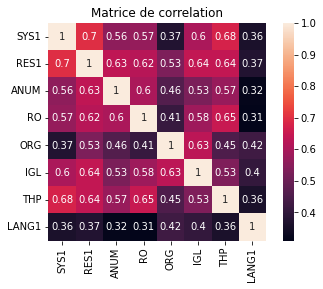

In [13]:
# Afficher la matrice de correlation
mat = df.corr()
sns.heatmap(mat, square=True, annot = True)
plt.title('Matrice de correlation')

**Observations**
- Une forte corrélation entre:
    - SYS1 et RES1.
    - SYS1 et THP.
    - RO et THP.
- Une faible corrélation entre LANG1 et les autres modules.

In [14]:
columns = df.columns
columns

Index(['SYS1', 'RES1', 'ANUM', 'RO', 'ORG', 'IGL', 'THP', 'LANG1'], dtype='object')

In [15]:
# Center et réduire le tableau de données
X = StandardScaler().fit_transform(df)
X

array([[ 2.05220689,  1.82304593,  2.06601942, ...,  2.25117393,
         2.98380314,  1.235651  ],
       [ 2.15817618,  1.48609076,  2.18816112, ...,  2.16201551,
         2.9016877 ,  2.34118171],
       [ 1.21729734,  1.13489806,  1.19782303, ...,  2.10257657,
         2.77687223,  1.235651  ],
       ...,
       [-1.60855037, -2.18244924, -3.01111385, ..., -2.15721421,
        -1.94312341, -1.24626545],
       [-1.39982299, -2.85635956, -2.35088846, ..., -2.88534124,
        -1.49313078, -2.50104281],
       [-3.14671066, -5.44284636, -3.25869837, ..., -2.14730772,
        -2.47851609, -0.51108753]])

## Analyse en composantes principales

Dans cette partie, on va effectuer l'analyse en composantes principales, et afficher toutes les résultats.

### Préparation de l'algorithme

On peut effectuer une ACP en utilisant la classe `PCA` de la bibliothèque scikitlearn. Cette classe peut prendre plusieurs paramètres comme le nombre de composantes principales. On doit d'abord instancier la classe `PCA`, et utiliser la fonction fit_transform qui va prendre en paramètres notre tableau de données X. On aura en retour, un tableau de données Y qui contient toutes les composantes prinicipales.

Pour plus d'information sur ça, visiter la [documentation officielle de Scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 

In [16]:
# Effectuer une analyse en composantes principales sur le tableau de données X
# Y va contenir toutes les composantes principales
pca = PCA()
Y = pca.fit_transform(X)

In [17]:
# Les interties expliquées par chaque axes
pca.explained_variance_ratio_

array([0.58570837, 0.10932422, 0.07914945, 0.0605902 , 0.05281001,
       0.04815526, 0.03662924, 0.02763325])

In [18]:
# Les valeurs propres
pca.explained_variance_

array([4.71459083, 0.87999248, 0.63710419, 0.48771374, 0.42508799,
       0.38762015, 0.29484275, 0.22243057])

In [19]:
# Les vecteurs propres
pca.components_

array([[-0.37165342, -0.39492519, -0.35721633, -0.36430175, -0.31880671,
        -0.37414704, -0.37450077, -0.25241633],
       [ 0.24724742,  0.12183482,  0.19518647,  0.27612538, -0.4942362 ,
        -0.17183903,  0.23179504, -0.69437382],
       [ 0.28544072, -0.04257366, -0.09064098,  0.01716005, -0.57472489,
        -0.33758805,  0.22448196,  0.64306632],
       [ 0.51422475,  0.16303645, -0.66790918, -0.33679749, -0.01973282,
         0.34551693,  0.06233422, -0.16062352],
       [-0.27495688, -0.32111479, -0.52573133,  0.65598989,  0.03697808,
         0.13167353,  0.30959942,  0.00327709],
       [-0.03859796, -0.02874747, -0.06408363, -0.31700387,  0.41865697,
        -0.51031653,  0.66698228, -0.11190903],
       [ 0.22166166, -0.78411137,  0.31165398, -0.21680603, -0.05792908,
         0.37206857,  0.22121897, -0.03426051],
       [-0.5732486 ,  0.28640044,  0.04849667, -0.31542504, -0.37867925,
         0.42537255,  0.40260095,  0.03299467]])

### Tableau des interties

In [20]:
# Crée un Dataframe qui va contenir les valeurs propres, les interties, et les interties cumulées
interties = pd.DataFrame()

In [21]:
# Calculer l'intertie cumulée pour chaque valeur propre
interties_cum = []
for i in range(len(pca.explained_variance_ratio_)):
    if (i==0):
        interties_cum.append(pca.explained_variance_ratio_[i])
    else:
        interties_cum.append(pca.explained_variance_ratio_[i]+interties_cum[i-1])

In [22]:
interties["Val. prop"] = pca.explained_variance_.tolist()
interties["Intertie"] = pca.explained_variance_ratio_.tolist()
interties["Intertie Cumulée"] = interties_cum

In [23]:
interties

,Val. prop,Intertie,Intertie Cumulée
0,4.714591,0.585708,0.585708
1,0.879992,0.109324,0.695033
2,0.637104,0.079149,0.774182
3,0.487714,0.060590,0.834772
4,0.425088,0.052810,0.887582
5,0.387620,0.048155,0.935738
6,0.294843,0.036629,0.972367
7,0.222431,0.027633,1.000000


**Observations**
- La majeure partie de l’information est contenue dans le premier axe factoriel (≃ 58.57%).
- Les autres axes factoriels n'apportent pas beaucoup d'informations.
- Pour garder plus que 80% de l'information, on doit prendre au moins les 4 premiers axes.


**Choix du nombre d'axes**

Alors, pour faire le choix du nombre d’axes à garder, on se fille au graphe d’éboulis (Scree plot) qui illustre le pourcentage des inerties des différents axes. On voit que celui-ci décroît à partir de 58.57% pour l’axe 1, 10.93% pour l’axe 2..

### Graphe d'éboulis

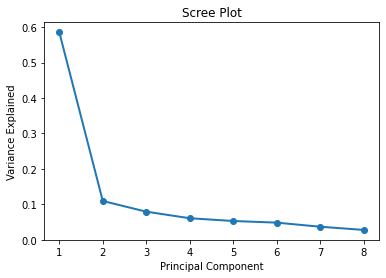

In [24]:
# Dessiner le graphe d'éboulis
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**Observation**

Après examination des résultats apportés par le graphe d'éboulis, on opte pour 3 axes car on a une inertie cumulée raisonnable de 77.41% avec une bonne réduction de dimensionnalité. Cependant, pour la suite de l’étude, on prefère d'opter pour 2 axes factoriels afin de pouvoir visualiser nos données sur un plan 2D.

### Projections des variables le plan factoriel

On commence avec l’étude de l’ACP sur les variables. On affiche alors leur projections, leur contributions relatives (cos2), ainsi que leur contributions absolues sur les deux axes choisis.

In [25]:
# Tirer les deux composantes principales
pc1 = Y[:,0]
pc2 = Y[:,1]

In [26]:
variables = pd.DataFrame()

In [27]:
# Les vecteurs propres données par PCA de scikitlearn sont normés
np.linalg.norm(pca.components_[0])

1.0000000000000002

In [28]:
# Construction d'un tableau qui contient les projects et les contributions des variables sur les deux axes
# On est dans le cas d'une ACP normée réduite, donc la norme des variables sera égale à 1
variables["Variables"] = df.columns
variables["W1"] = pca.components_[0]*math.sqrt(pca.explained_variance_[0])
variables["W2"] = pca.components_[1]*math.sqrt(pca.explained_variance_[1])
variables["Ca1"] = (variables["W1"]**2)/pca.explained_variance_[0]
variables["Ca2"] = (variables["W2"]**2)/pca.explained_variance_[0]
variables["Cos1"] = (variables["W1"]**2)
variables["Cos2"] = (variables["W2"]**2)
variables["Cos12"] = variables["Cos1"] + variables["Cos2"]

In [29]:
variables

,Variables,W1,W2,Ca1,Ca2,Cos1,Cos2,Cos12
0,SYS1,-0.806975,0.231938,0.138126,0.011410,0.651209,0.053795,0.705004
1,RES1,-0.857505,0.114291,0.155966,0.002771,0.735315,0.013062,0.748378
2,ANUM,-0.775628,0.183100,0.127604,0.007111,0.601598,0.033526,0.635124
3,RO,-0.791012,0.259027,0.132716,0.014231,0.625701,0.067095,0.692796
4,ORG,-0.692228,-0.463633,0.101638,0.045594,0.479180,0.214955,0.694135
5,IGL,-0.812390,-0.161199,0.139986,0.005512,0.659977,0.025985,0.685962
6,THP,-0.813158,0.217442,0.140251,0.010029,0.661225,0.047281,0.708506
7,LANG1,-0.548074,-0.651378,0.063714,0.089996,0.300385,0.424293,0.724678


In [30]:
variables["Ca1"].sum()

1.0000000000000004

In [31]:
variables["Ca2"].sum()

0.18665299183167577

#### Interpretations


**Contributions Absolues**

- **Axe 01 -**  Les variables ayant contribué à la construction de l’axe 1 sont RES1, THP, SYS1, IGL, RO et ANUM. Ces variables ont une contribution absolues qui dépasse la contribution moyenne (1/8). Les projections de ces variables sur l'axe sont toutes de meme signe, ce qui fait, on peut dire que l'axe 01 est un axe à effet taille qui mesure les individus bons et mauvais dans ces modules là.
    
- **Axe 02 -**  Les variables n'ont pas une contribution absolue intéréssante à la contrusction de l'axe 2, la plus grande contribution est celle de LANG1 (≃0.089). Celà est due au fait que cet axe n'apporte pas beaucoup d'informations (intertie ≃0.1093).	

**Construction du plan factoriel**
- Les variables ayant contrinué le plus à la construction du plan factoriel sont: RES1, LANG1, THP, et SYS1. Ce sont celles qui se rapprochent du cercle de corrélation.

### Représentation des individus sur le plan factoriel

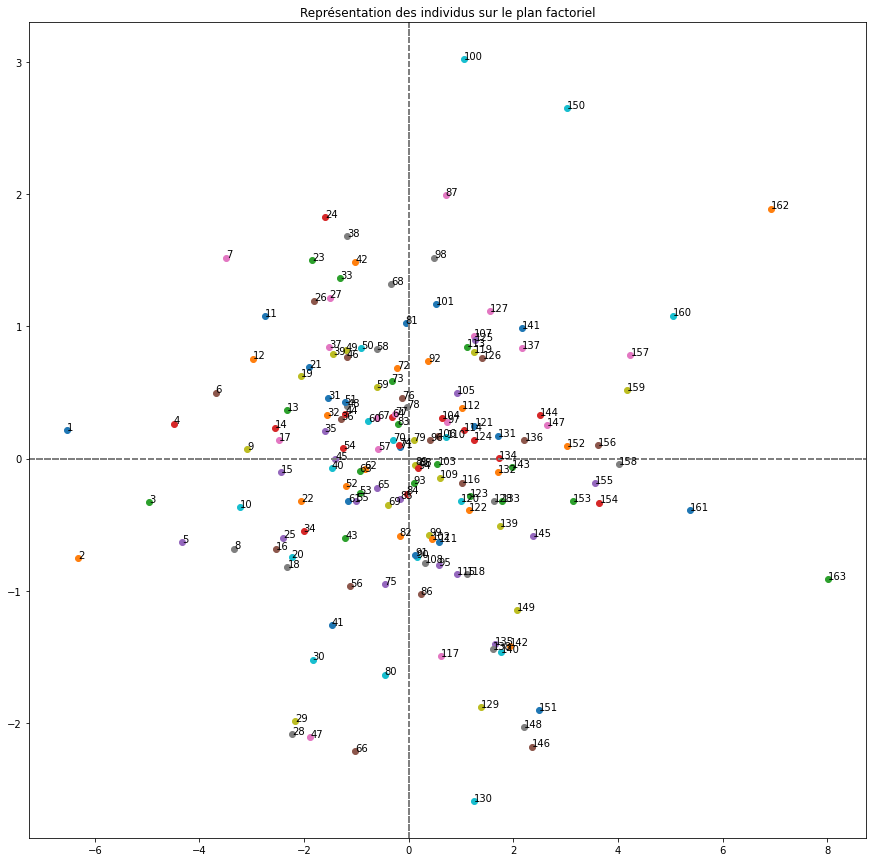

In [32]:
# Représentation du nuage de points qui montre la dispersion des individus sur le plan factoriel
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(pc1.shape[0]):
    plt.scatter(pc1[i], pc2[i])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    ax.set_title('Représentation des individus sur le plan factoriel')

### Cercle de corrélation des variables

In [33]:
W = pd.DataFrame(data=X, columns=df.columns)

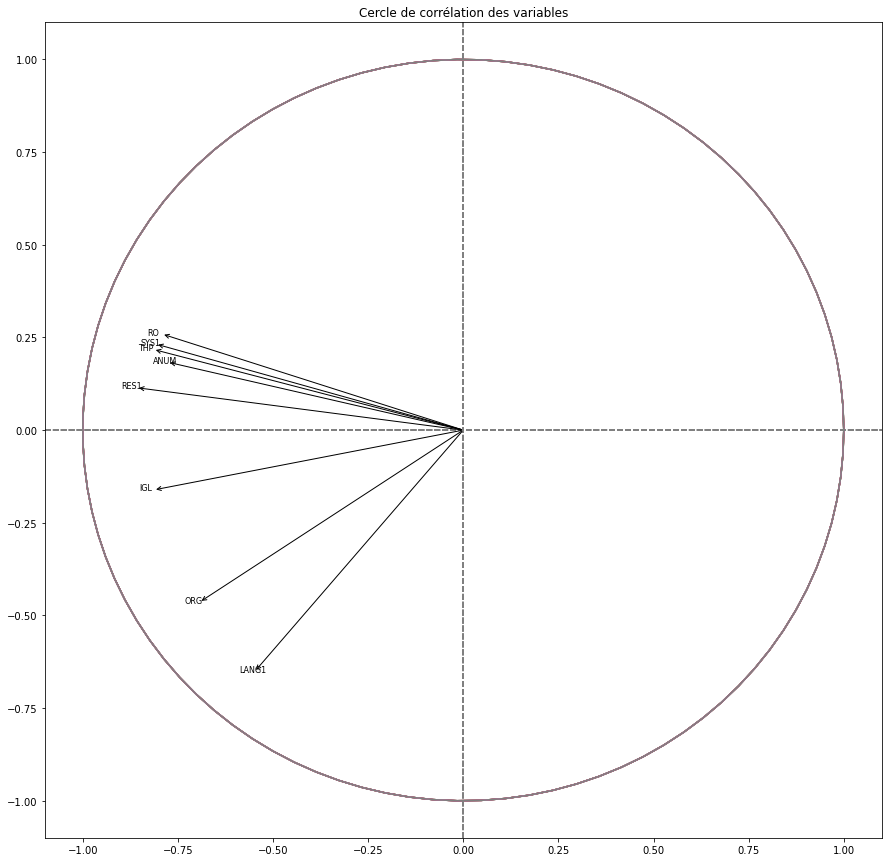

In [34]:
# Représentation du cercle de corrélation
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(W.shape[1]):
    x = variables["W1"][i]
    y = variables["W2"][i]
    ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
    ax.annotate(W.columns[i], (x-0.04,y-0.002), size=8)
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    ax.set_title('Cercle de corrélation des variables')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

### Interprétation 

Après avoir représenter le nuage d'individus sur le plan factoriel, ainsi que le cercle de corrélation. On peut tirer les résultats suivants:
- Les bons étudiants ayant de bonnes notes dans la majorité des modules se situent dans la partie gauche du graphe (E.g les individus qui ont été classés parmis les 3 premiers se situent tous dans cette partie, et sont éloignés du centre de gravité).
- Les mauvais étudiants ayant de mauvaise notes dans la majorité des modules se situent dans la partie droite du graphe (E.g les individus qui ont été classés parmis les derniers se situent tous dans cette partie du graphe, idem, ils sont éloignés du centre de gravité).
- Les étudiants moyens se situent tout autour du centre de gravité.

**Exemple**

Dania Alaa Adimi représentée par l'individu 64.

Selon sa position dans le graphe, cet étudiant est un étudiant moyen car il est très proche du centre de gravité du nuage d'individus.

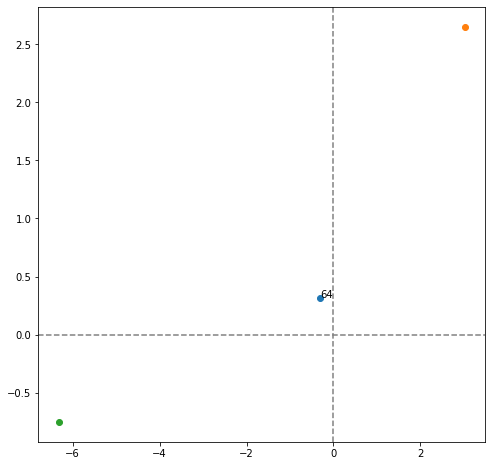

In [41]:
# Représentation du nuage de points qui montre la dispersion des individus sur le plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(pc1[63], pc2[63])
ax.annotate(str(64), (pc1[63],pc2[63]))
plt.scatter(pc1[149], pc2[149])
plt.scatter(pc1[1], pc2[1])
ax.axhline(y=0, color="grey", linestyle="--")
ax.axvline(x=0, color="grey", linestyle="--")

In [42]:
df.describe()

,SYS1,RES1,ANUM,RO,ORG,IGL,THP,LANG1
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,12.719202,14.058650,12.621472,9.490184,12.258528,11.955153,10.165828,14.424601
std,3.123706,2.113599,3.038604,2.498804,1.870509,2.025100,3.053876,1.814661
min,2.920000,2.590000,2.750000,3.000000,5.180000,6.130000,2.500000,7.630000
25%,10.870000,12.950000,11.205000,7.805000,11.270000,10.625000,8.000000,13.410000
50%,12.820000,14.280000,13.000000,9.440000,12.400000,11.870000,10.500000,14.510000
75%,15.140000,15.545000,14.500000,11.045000,13.330000,13.340000,12.250000,15.550000
max,19.440000,18.060000,19.250000,17.780000,17.100000,17.250000,19.250000,18.660000


In [44]:
# On remarque que pratiquement toutes les notes s'approches de la moyenne
df.loc[63]

SYS1     15.21
RES1     13.97
ANUM     13.00
RO        6.03
ORG      13.19
IGL      13.67
THP      12.38
LANG1    12.58
Name: 63, dtype: float64

In [40]:
df.loc[63].mean()

12.50375